In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [2]:
file_list

['../data/raw/1_2025-05-12_21-02.csv', '../data/raw/1_2025-05-12_19-27.csv']

In [3]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [4]:
main_dataframe


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,OPN PARTNER,real_estate_agent,https://www.cian.ru/sale/flat/310107816/,Москва,sale,flat,6,12,1,40.0,-1,0,8490000,NaN,Харлампиева,52к1,Филатов Луг,Спортивный квартал
3,Юрий Артамонов,realtor,https://www.cian.ru/sale/flat/316989525/,Москва,sale,flat,5,12,1,35.1,-1,0,15950000,Даниловский,Сайкина,2,Автозаводская,NaN
4,Татьяна Серебрякова,realtor,https://www.cian.ru/sale/flat/314672030/,Москва,sale,flat,14,16,1,40.0,-1,0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Елена Кузнецова,realtor,https://www.cian.ru/sale/flat/305752436/,Москва,sale,flat,1,9,1,30.8,-1,0,9500000,Ростокино,Малахитовая,17,Ростокино,NaN
1307,ИП Шакарян Э.А.,real_estate_agent,https://www.cian.ru/sale/flat/316247456/,Москва,sale,flat,2,9,1,30.4,-1,0,9500000,Богородское,Игральная,10,Бульвар Рокоссовского,NaN
1308,ДСК-Недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/311152667/,Москва,sale,flat,4,14,1,38.0,-1,0,9500000,Чертаново Южное,Чертановская,54К1,Улица Академика Янгеля,NaN
1309,РЕЗУЛЬТАТ,real_estate_agent,https://www.cian.ru/sale/flat/316679268/,Москва,sale,flat,4,17,1,37.0,-1,0,9500000,Некрасовка,Липчанского,5к1,Некрасовка,NaN


In [5]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<AxesSubplot:>

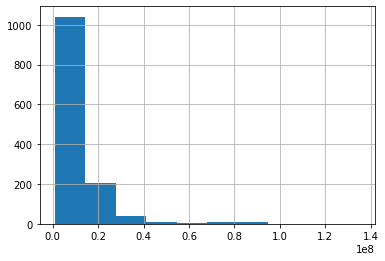

In [6]:
new_dataframe['price'].hist()

In [7]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

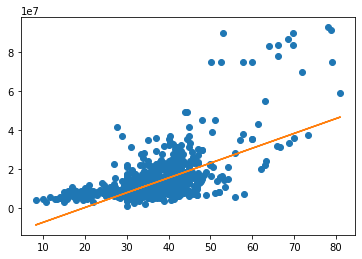

In [8]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [9]:
new_df.to_csv('../data/processed/train.csv', index=False)